# BM 336546 - HW1: Fetal Cardiotocograms 
# Part I: Data Exploration

In this homework you will be working on predicting fetal outcomes from continuous labor monitoring using Cardiotography (CTG). In particular you will use measures of the fetal heart rate (FHR) and use these as input features to your linear classifier. Before we dive into the assignment itself, let's make a quick introduction to CTG and get familiar with this type of examination and its underlying physiological basis as a good biomedical engineer!

Intrapartum CTG is used routinely to measure maternal uterine pressure and fetal heart rate (FHR). Antepartum CTG monitoring is used to identify fetuses at risk of intrauterine hypoxia and acidaemia. As early as 28 weeks of gestation, analysis of the FHR trace is used as a nonstress test to assess the fetal well-being. In the perinatal period, timely, appropriate intervention can avoid fetal neurological damage or death. The CTG is visually assessed by a clinician or interpreted by computer analysis. In the context of labor monitoring, the CTG is used for continuous fetal monitoring. An abnormal heart rate will lead the clinician to perform a cesarean. We will focus on CTG monitoring during labor in this assignment.

The CTG has two different transducers: One of them is a transducer placed on the mother’s abdomen, above the fetal heart, to monitor heart rate using Doppler probe (cardiogram). The other is located at the fundus of the uterus to measure frequency of contractions (tocogram). Tocodynamometry is a strain gauge technology provides contraction frequency and approximate duration of labor contractions.

We can extract a lot of features from a CTG. Here are some of them:
* **Uterine activity**: Duration, frequency and intensity of contractions.
* **Baseline FHR**: Mean FHR rounded to increments of 5 beats per minute (bpm) during a 10-minute window.
* **Baseline FHR variability**: Fluctuations in the baseline FHR that are irregular in amplitude and frequency.
* **Presence of accelerations**: A visually apparent abrupt increase in fetal heart rate.

Here is an example of a typical CTG with some of its features:

![img](https://ai2-s2-public.s3.amazonaws.com/figures/2017-08-08/6ed5ef1da100ebc2241c3a3945e1da9ce79f73ac/1-Figure1-1.png)

The CTG dataset is an Excel file which was sent to you. For more information, please look at the Excel sheet called Description or take a look at this [link](http://archive.ics.uci.edu/ml/datasets/Cardiotocography). Our main goal in this assignment is to train an algorithm to decide what is the fetal state according to the extracted features. Before we even start dealing with the data itself, we should apply the first and most important rule of data/signal processing: **ALWAYS LOOK AND UNDERSTAND THE DATA FIRST!**

In order to do that, we will load the file into a variable called CTG_features and use descriptive statistics and visualization tools you have seen in the lectures.


In [46]:
# This block makes sure the following cells are synchronized with the modules (.py files).
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
import pandas as pd 
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

file = Path.cwd().joinpath('messed_CTG.xls') # concatenates messed_CTG.xls to the current folder that should be the extracted zip folder 
CTG_dataset = pd.read_excel(file, sheet_name='Raw Data')
CTG_features = CTG_dataset[['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DR', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV',
 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency']]
CTG_morph = CTG_dataset[['CLASS']]
fetal_state = CTG_dataset[['NSP']]

First  look at the data in your Excel file. You can see that in some of the cells we have '--' or NaN etc. Furthermore, the description tells us that the feature `DR` was removed although we did load it into our dataset. Your first job is: Implement the function `rm_ext_and_nan` in the module  `clean_data` so it will remove the extra feature `DR` (ignore the feature), and **all** non-numeric values (ignore the samples). Notice that real data can have missing values in many different ways and thus your implementation has to be generic. This function should return a dictionary of features where the values of each feature are the clean excel columns without the `DR` feature. **Hint**: In order to eliminate every cell that is non-numeric, you will have to transform it first to NaN and only then eliminate them. **Note**: `CTG_dataset` is a `pandas DataFrame` and every element within it is called `pandas series`. Implement the function in a single line of code using dictionary comprehensions.

A note on debugging using PyCharm (**Highly recommended**):
* In order to fill the needed modules (i.e. the .py files functions like "rm_ext_and_nan" in the next block) we must open the .py files by some text editor. A simple solution would be to open it in this notebook by double-clicking on the file, but no debugging options are available. To debug the file you can open the directory of this homework as a project in PyCharm (see Moodle video), and then run the .py file in debug mode. In order to execute a function, you must prepare it's input variables beforehand. For example, in "clean_data.py" you will see in the "Debugging Block!" the same lines from the previous block (copy paste) and the next in order to run "rm_ext_and_nan" function successfully. To debug other functions you should do a similar procedure.

In [48]:
from clean_data import rm_ext_and_nan as rm
extra_feature = 'DR' 
c_ctg = rm(CTG_features, extra_feature)

Compare and make sure that your function works well: let's compare the histograms' width feature . First we will plot the original distribution of this feature where every NaN element was replaced by a value that is not reasonable as 1000 :

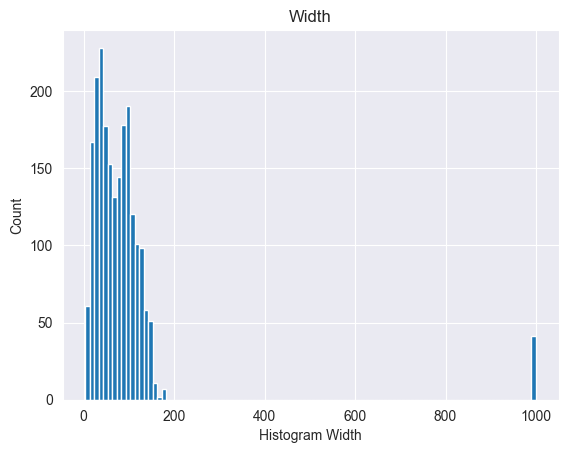

In [49]:
import matplotlib.pyplot as plt
feat = 'Width'
Q = pd.DataFrame(CTG_features[feat])
idx_na = Q.index[Q[feat].isna() == True].tolist()
for i in idx_na:
    Q.loc[i] = 1000
Q.hist(bins = 100)
plt.xlabel('Histogram Width')
plt.ylabel('Count')
plt.show()

Now run the following lines of code to check how you performed:

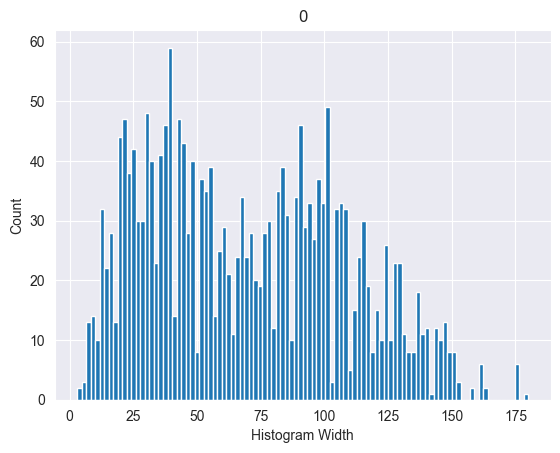

In [50]:
feat = 'Width'
Q_clean = pd.DataFrame(c_ctg[feat])
Q_clean.hist(bins=100)
plt.xlabel('Histogram Width')
plt.ylabel('Count')
plt.show()

Now that we are warmed up, let's do something a bit different. Instead of removing the NaN values, handle those missing values using sampling (**Tutorial C02**). Again, first convert all non-numeric values to NaN and only then apply the sampling method. Implement the function `nan2num_samp`. Don't forget to remove `DR` again.

In [51]:
from clean_data import nan2num_samp
extra_feature = 'DR' 
c_samp = nan2num_samp(CTG_features, extra_feature)

Now run the following lines of code to check how you performed for example with the feature `MSTV`:

In [52]:
feat = 'MSTV'
print(CTG_features[feat].iloc[0:5]) # print first 5 values
print(c_samp[feat].iloc[0:5])

0    NaN
1     --
2     --
3    2.1
4    2.4
Name: MSTV, dtype: object
0    0.8
1    0.8
2    0.6
3    2.1
4    2.4
Name: MSTV, dtype: float64


Let's visualize our "clean" data using histograms, barplots and boxplots and then refer to the following questions below.

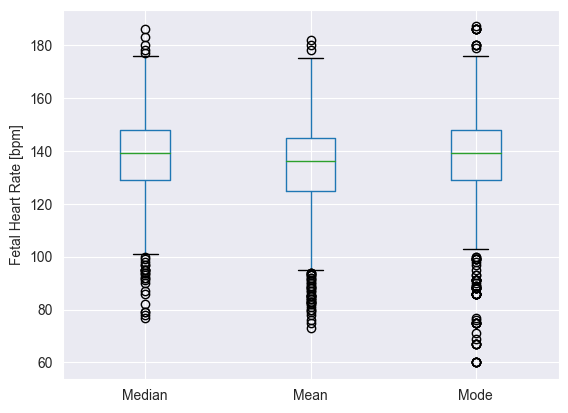

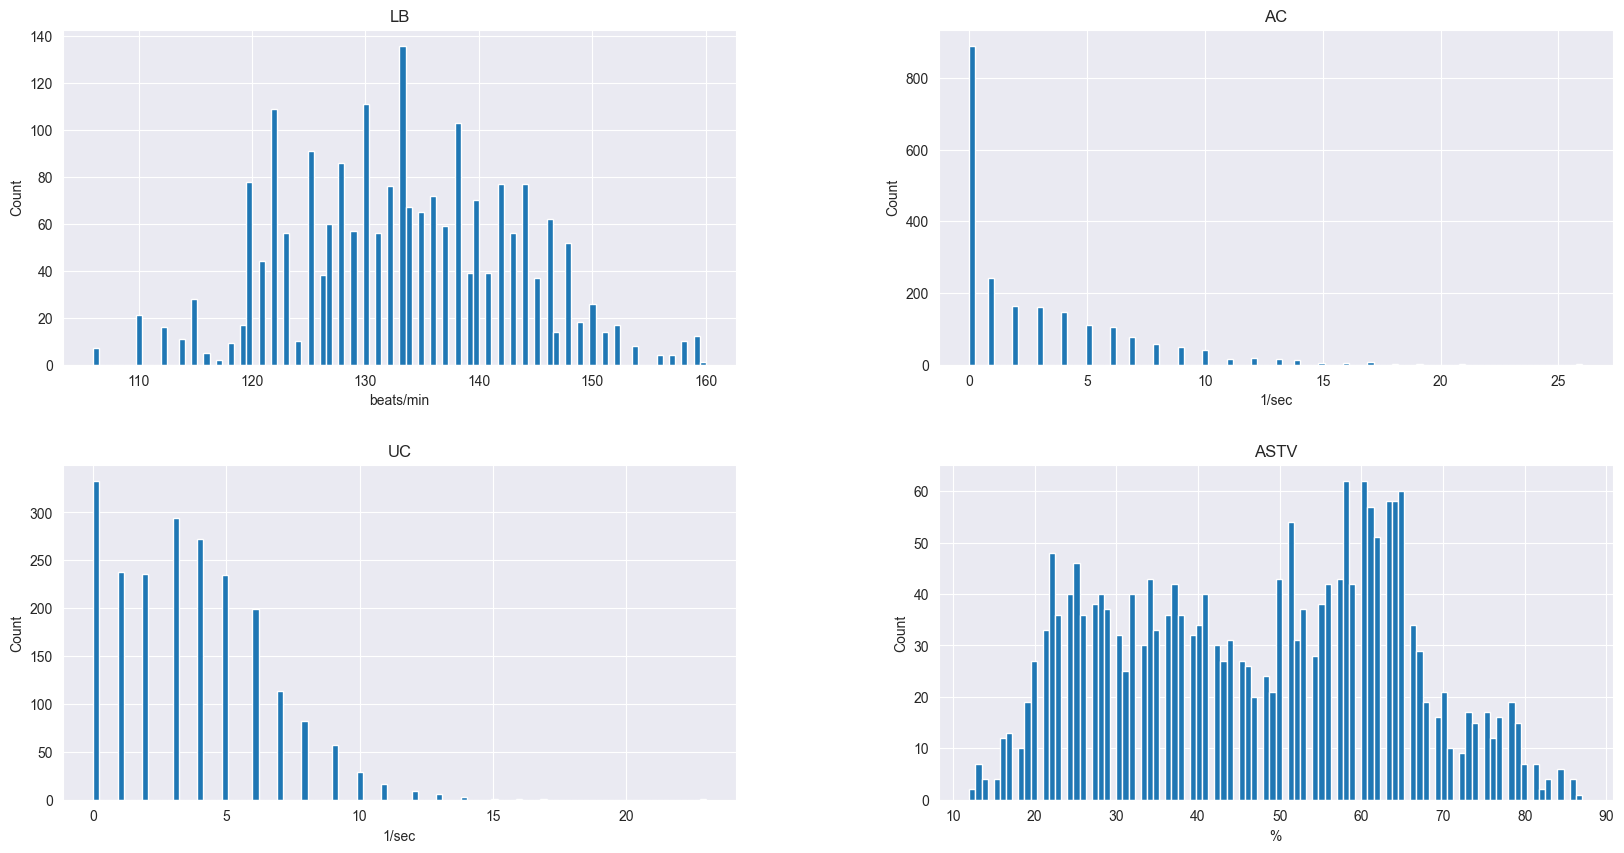

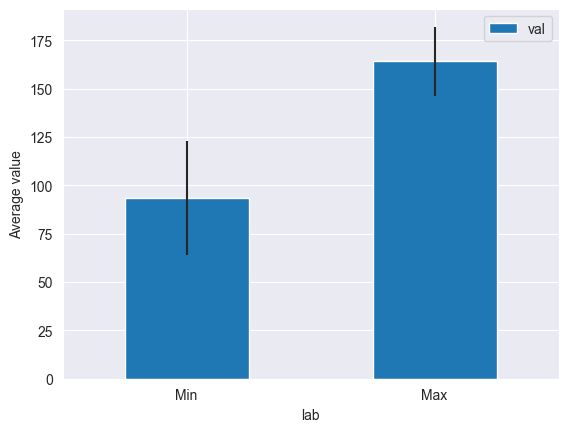

In [53]:
# Boxplots
c_samp.boxplot(column=['Median','Mean','Mode'])
plt.ylabel('Fetal Heart Rate [bpm]')
# Histograms
xlbl = ['beats/min','1/sec','1/sec','%']
axarr = c_samp.hist(column=['LB', 'AC', 'UC','ASTV'], bins=100,layout = (2, 2),figsize=(20, 10))
for i,ax in enumerate(axarr.flatten()):
    ax.set_xlabel(xlbl[i])
    ax.set_ylabel("Count")
# Barplots (error bars)
df = pd.DataFrame.from_dict({'lab':['Min','Max'], 'val':[np.mean(c_samp['Min']), np.mean(c_samp['Max'])]})
errors = [np.std(c_samp['Min']), np.std(c_samp['Max'])] 
ax = df.plot.bar(x='lab', y='val', yerr=errors, rot=0)
ax.set_ylabel('Average value')
plt.show()

**Remarks**: 
* Please answer all of the following questions within the notebook itself. Remember that the only files you will submit are the notebook and the fully-implemented `.py` files.
* Do not change the notebook's cells unless you were specificly told to (such as the "Answers" cells etc.). 

### Questions:
**Q1:** What information can you get from histograms and what information can you get from boxplots?

**Q2:** Error bars can be misleading. In what sense?

### Answers:
**Q1:**
Boxplots allow you to get statistical information about you data, such as Min and Max values, Median, 25th and 75th percentiles (Q1,Q3), outliers and so on. Histograms give you numerical information about your data which is the number of occurances per value for which you plotted the histogram. Also, histograms allow to see the distibution formation of the data, while boxplots do not.

**Q2:**
Error bars are extremely affected by statistics of the samples, such as outliers, sample size and etc, in such way that the same error bar can be calculated for a very diffrent data. Furthermore, when plotting error bars for diffrent group in one bar plot, those group can have significant statistical diffrences between them (such as sample sizes, outliers and so on) so that we can't compare those error bars to get reliable and robust conclusions.

Now that we have visualized  the data, cleaned them and obtained some insights from them, we would like to compute the summary statistics for each feature. Implement the `sum_stat` function which returnes a dictionary of dictionaries, meaning that a key value of a feature will return a dictionary with keys of min, Q1, median, Q3, max. **Do not use pandas `describe()` function in this implementation**.
It should look something like this:

d_summary = {<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;"MSTV": {<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;"min": 2.0, <br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;"Q1": 3.0,<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;"median": 4.0, <br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;"Q3": 5.0, <br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;"max": 6.0, <br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;},<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;"LB": {<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;"min": ..., <br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;"Q1": ...,<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;"median": ..., <br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;"Q3": ..., <br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;"max": ..., <br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;},<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;}<br>
<br> 
You can access with : d_summary["MSTV"]["min"] = 2.0

You can use that output in order to have another cleanup and this time, it will be a cleanup of outliers. We will stick to the definition of an outlier according to the five number summary that are actually represented by boxplots. Just as a reminder and comparison to a normal distribution, have a look at the next figure:




<img src="https://miro.medium.com/max/1400/1*NRlqiZGQdsIyAu0KzP7LaQ.png" width="400">

In [54]:
from clean_data import sum_stat as sst
d_summary = sst(c_samp)
print(d_summary['MSTV'])
print(d_summary['DP'])

{'Min': 0.2, 'Q1': 0.7, 'Median': 1.2, 'Q3': 1.7, 'Max': 7.0}
{'Min': 0.0, 'Q1': 0.0, 'Median': 0.0, 'Q3': 0.0, 'Max': 4.0}


Implement the function `rm_outlier` that will have the output of `sum_stat` as an input and will return a DataFrame of the that will have outliers removed. In order to avoid issues of different lengths of entries, instead of removing the outliers, simply replace them with `np.nan`.

In [55]:
from clean_data import rm_outlier
c_no_outlier = rm_outlier(c_samp, d_summary)

Let's take the features `Median`, `Mean` and `Mode` for comparioson previous to outliers removal and after it using boxplots. First we plot the original data:

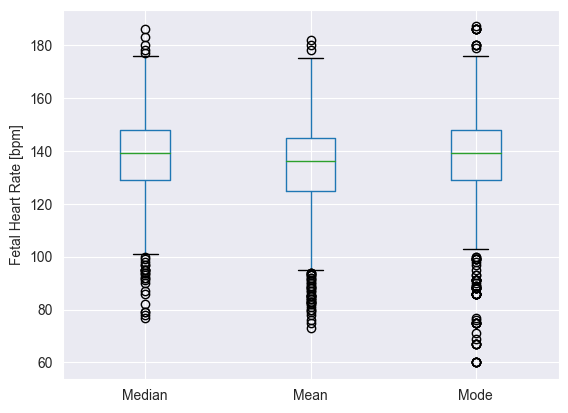

In [56]:
c_samp.boxplot(column=['Median','Mean','Mode'])
plt.ylabel('Fetal Heart Rate [bpm]')
plt.show()

Now we plot the "clean data":

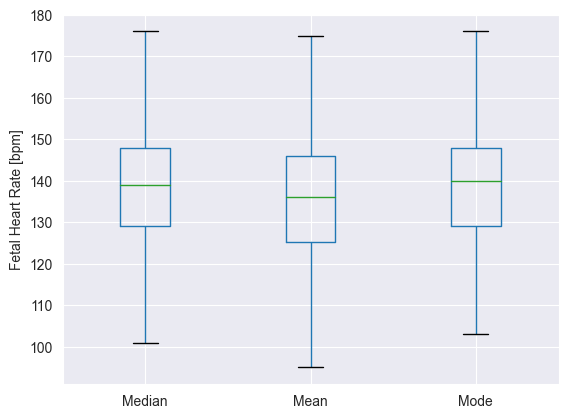

In [57]:
c_no_outlier.boxplot(column=['Median','Mean','Mode'])
plt.ylabel('Fetal Heart Rate [bpm]')
plt.show()

### Questions:
**Q3:** Boxplotting the data after the outliers were removed shows us that there are no outliers anymore. Is it necessarily always the case, meaning if you take the "clean" data and boxplot it again will it have no outliers for sure?

### Answers:
**Q3:** The action of removing the outliers also changes the data statistics. The quantiles (by which the outliers are calculated) are changing as well, therefore it is not garuanteed that we will have no outliers after removing the original outliers, as boxplotting calculates statistics for the current data (after the removal), which can contain outliers.

Now, there is one more thing that should be reminded in the aspect of data exploration and it is the second rule of this field that states the following: **USE COMMON SENSE!**

What it really means is that if you have some physiological prior (e.g. you know the range of values of your features), so you should have some sanity checks. For example, the feature `LB` tells us about the FHR baseline. It won't make any sense if we found values that are higher than 500 bpm, not even mentioning non-positive values. Your next mission is to implement the function `phys_prior` where you choose one feature (which is not `LB`), explain what you think it's normal range is and clean it accordingly. The function will have `c_samp`, the feature that you chose and a threshold as inputs. The explanation should be written shortly as a comment next to the input as you can see at the following cell. The only lines you can change here are the `feature` value, the `thresh` value and its comment.

In [58]:
from clean_data import phys_prior as phpr
feature = 'UC'
'''
Uterine Contractions (UC) is the number of contractions appears in 10 minutes window, averaged over 30 minutes. Normal UC is about 3-5 contractions in 10 minutes, each lasting 30 to 40 seconds. Therefore, we will not expect to receive UC of over 10 even in pathological cases.
https://www.ncbi.nlm.nih.gov/books/NBK532927/
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7105557/
https://www.perinatology.com/Fetal%20Monitoring/Intrapartum%20Monitoring.htm
'''
thresh = 10
filt_feature = phpr(c_samp, feature, thresh)

## Data Scaling: Standardization and Normalization

By this point you have successfully cleaned your dataset, well done! The clean dataset was saved in pickle format called `objs.pkl`.

In [59]:
import pickle

with open('objs.pkl', 'rb') as f:
    CTG_features, CTG_morph, fetal_state = pickle.load(f)
orig_feat = CTG_features.columns.values

Now we will address an important step in data science which is called feature scaling. Here we will discuss about standardization and normalization. As you saw in the lectures, scaling enables us to prepare features that take their value in different ranges and map them to a “normalized” features that take their values in similar ranges.
Implement the methods of the class `NSD`. The `transform` method function will return the data normalized/standardized according to the mode. You should also choose two features for comparison (using histograms) between the original data and the different modes. The two histograms should be plotted at the same figure with different colors as you saw in the lecture. You should have one figure per `mode` plus original data so ath the next cell you would end up with 4 figures having two histograms per figure. Use `matplotlib` as you saw in your tutorials. The argument `flag` is used for visibility of histograms.  There are three types of `mode`: `'standard','MinMax' and 'mean'` as shown in the lecture. You may change `selected_feat` in the next cell if youl'd like to see that your implemetations apply well on other features as well.


**Notice:**

1. `fit` method should calculate all needed values for all possible modes. The mode is chosen only in `transform` (or `fit_transform`).


2. Once you apply the transformation, it should return a datframe which all of its samples in all of of the features are scaled correctly according to the mode. The chioce of `selected_feat` is only for those features that you would like to plot their histograms but all of the features have to be scaled regardless the ones you choose to plot.
**Hint**: Use of `df.apply(np.mean)` for example would return a series that could be broadcasted easily with df1 for different calculations. Thus, `df - df.apply(np.mean)` would return a Dataframe where the **adequate** mean value was extracted, for instance the `LB` series will now be `LB-mean(LB)`. 


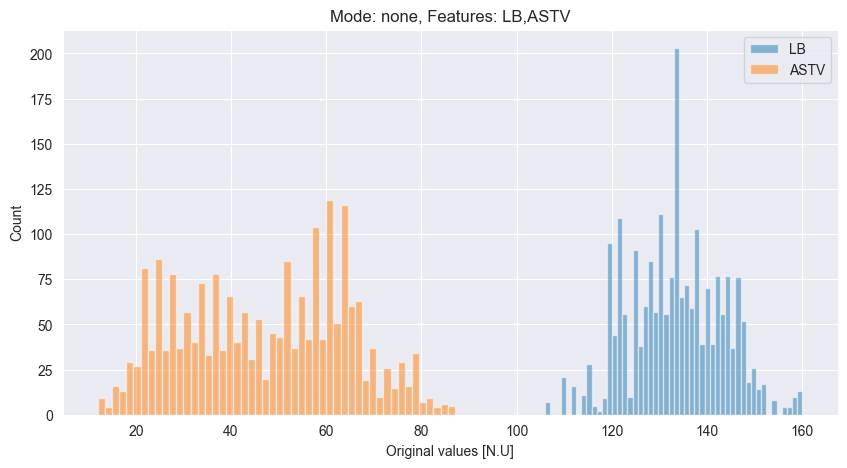

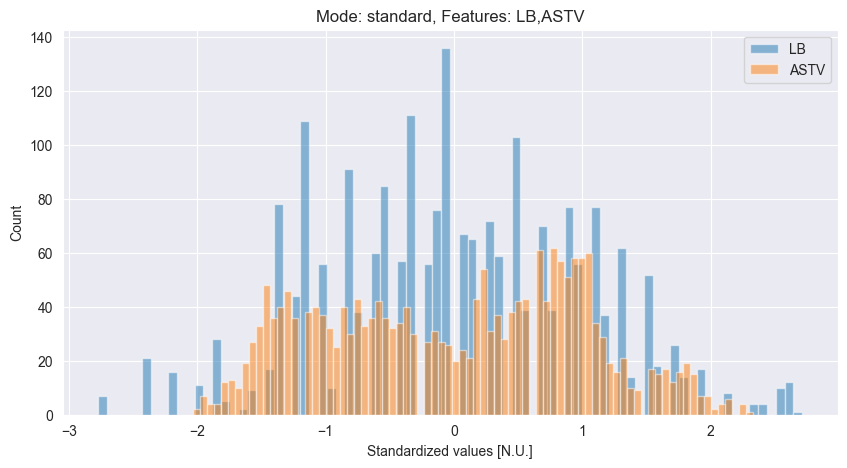

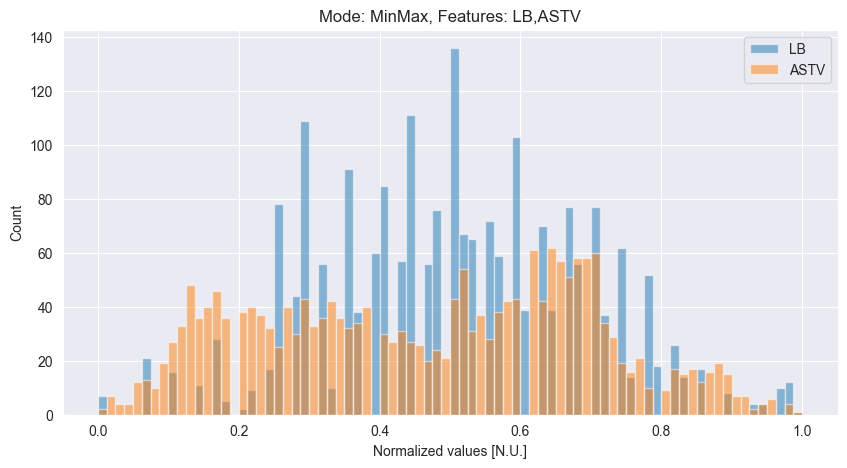

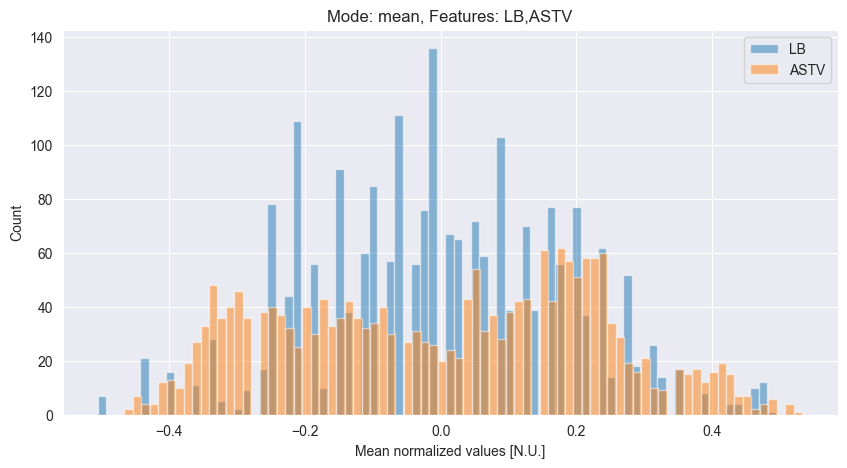

In [60]:
from clean_data import NSD
selected_feat = ('LB','ASTV')
scaler = NSD()
orig = scaler.fit_transform(CTG_features, selected_feat=selected_feat, flag=True)
nsd_std = scaler.fit_transform(CTG_features, mode='standard', selected_feat=selected_feat, flag=True)
nsd_norm = scaler.fit_transform(CTG_features, mode='MinMax', selected_feat=selected_feat, flag=True)
nsd_norm_mean = scaler.fit_transform(CTG_features, mode='mean', selected_feat=selected_feat, flag=True)

### Questions:
**Q4:** Explain why normalization is not useful when there are outliers with extremely large or small values.

### Answers:
**Q4:** Normalization are based on the global min and max values of the data. Outliers existence can make those values extremly out of scale in respect to the rest of the data, so that the process of mapping the values to their new range won't work as expected - all the "clean" data will be compressed to a very small range of values in the new normalized range, while the outliers will appear near the upper and lower bounds values in the new range.

# Part II: Linear Classifiers

Finally, after all of the hard work we can now harvest the fruits (your functions from Part I) in order to do some proper machine learning!  

Note: It is recommended that you attend the second workshop for this part and use the notes in your homework folder.

In this assignment we will assume that our data is linearly separable and we will use logistic regression as our classification method. In other words, we choose a linear hypothesis class function . We would try to make the separation in the feature domain (i.e. our graph axes are the features) and we will have a multiclass problem.

For every sample (example as called in the lecture) we have two types of labels and we will deal only with one of them. Our goal is to learn the function that gets a sample as an input and returns a predicted value which is supposed to be the calss (label) that it belongs to. Our type of label will be `fetal_state`. Before we continue towards the "learning" part we will have another look at our data. Starting with our labels distribution.

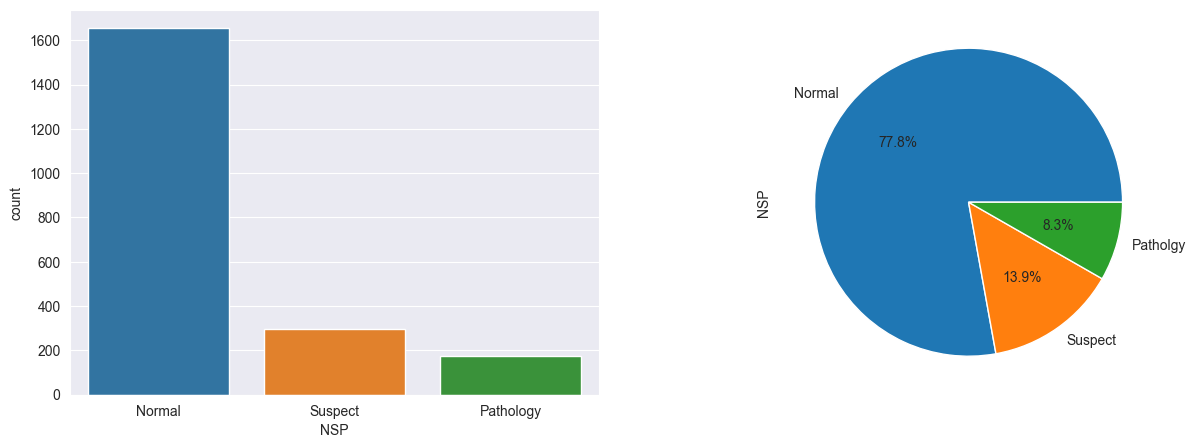

Normal samples account for 77.85% of the data.
Suspect samples account for 13.88% of the data.
Pathology samples account for 8.28% of the data.


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
# with seaborn:
g = sns.countplot(x = 'NSP', data = fetal_state, ax=axes[0])
g.set(xticklabels=['Normal','Suspect','Pathology'])
# with matplotlib
fetal_state.NSP.value_counts().plot(kind="pie", labels=['Normal','Suspect', 'Patholgy'], autopct='%1.1f%%', ax=axes[1])
plt.show()
idx_1 = (fetal_state == 1).index[(fetal_state == 1)['NSP'] == True].tolist()
idx_2 = (fetal_state == 2).index[(fetal_state == 2)['NSP'] == True].tolist()
idx_3 = (fetal_state == 3).index[(fetal_state == 3)['NSP'] == True].tolist()
print("Normal samples account for " + str("{0:.2f}".format(100*len(idx_1)/len(fetal_state))) + "% of the data.")
print("Suspect samples account for " + str("{0:.2f}".format(100*len(idx_2)/len(fetal_state))) + "% of the data.")
print("Pathology samples account for " + str("{0:.2f}".format(100*len(idx_3)/len(fetal_state))) + "% of the data.")

We can see that most of the CTG's were labeled as normal. Mostly, lables are made by professionals (in our case, doctors) based on the interpretation of the FHR and our job is to make the computer make the same decisions as a doctor would do but automatically. Now let's get the feeling of how well the features correlate with the labels and with one another. 

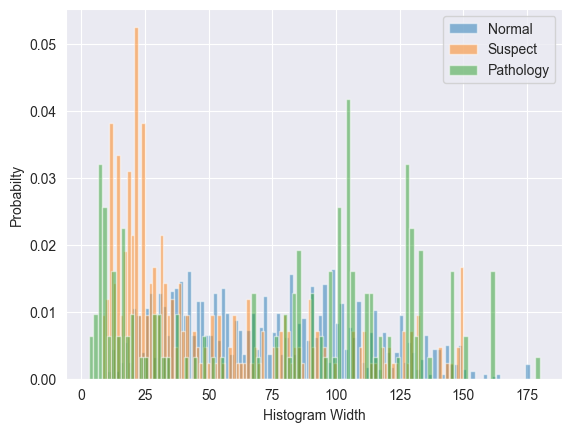

In [62]:
bins = 100
feat = 'Width'
plt.hist(CTG_features[feat].loc[idx_1], bins, density=True, alpha=0.5, label='Normal')
plt.hist(CTG_features[feat].loc[idx_2], bins, density=True, alpha=0.5, label='Suspect')
plt.hist(CTG_features[feat].loc[idx_3], bins, density=True, alpha=0.5, label='Pathology')
plt.xlabel('Histogram Width')
plt.ylabel('Probabilty')
plt.legend(loc='upper right')
plt.show()

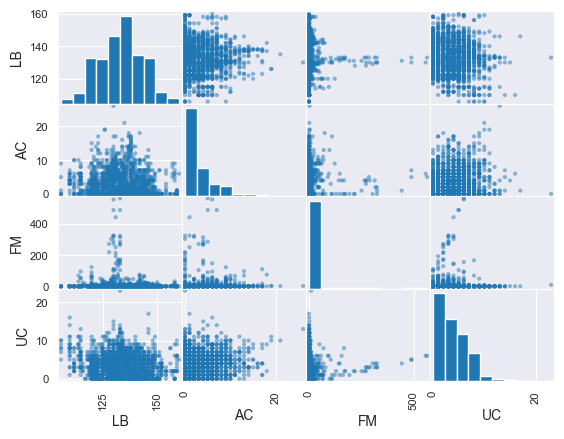

In [63]:
pd.plotting.scatter_matrix(CTG_features[['LB','AC','FM','UC']])
plt.show()

### Questions:
**Q5:** What information does feature-feature correlation provide?

### Answers:
**Q5:** Feature-feature correlation provides information on how much does two features are dependent on one another, but only in a linear way.
When training a model, this information helps us on the feature selection process. For example, if two features are highly dependent on one another (Have high feature-feature correlation), one of them is most likely unnecessary for the model.


Alright, we are pretty much done with data exploration. Now the learning part begins. As you saw in the tutorials, one of the most common and useful packages that Python has to offer in the learning field is `sklearn` package. The first thing you need to do after exploring your data is to divide it into 2 sets: `training set` and `test set`. As a rule of thumb, a typical split of your dataset is 80%, 20%  respectively. Later on we will also use validation set.
One of the most common linear classification models is logistic regression – abbreviated ‘LR’. We will use this model through our assignment from now on. 
Implement the function `pred_log` which is in the module `lin_classifier`. It should return a tuple of two elements. The first one is a vector of predicted classes and the other one is the weighting matrix (w) that should have the shape of (# of classes, # of features).

As you noticed, most of our data is labeled as "Normal" which means that our data is *imbalanced*. This is the reason why we *stratification* when we split out data to training and test sets. Stratification means that the split preserves the percentage of samples for each class.

In [64]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from lin_classifier import *
orig_feat = CTG_features.columns.values
X_train, X_test, y_train, y_test = train_test_split(CTG_features, np.ravel(fetal_state), test_size=0.2, 
                                                    random_state=0, stratify=np.ravel(fetal_state))
logreg = LogisticRegression(solver='saga', multi_class='multinomial', penalty='none', max_iter=10000)
y_pred, w = pred_log(logreg, X_train, y_train, X_test)
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred))) + "%")
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred, average='macro'))) + "%")

Accuracy is: 88.03%
F1 score is: 78.32%


Hopefully, you got about 88% accuracy. Not bad! This is a better result comparing the naive classifier (prediciting a "Normal" label for every sample) that should have given us around 77% accuracy. Now we'll practice an interpretation of the results. As you saw in lecture 4, odds ratio can be applied on binary LR, and here we'll expand it to the multinomial (ovr) case. We want to explore how addition of +1 to a specific feature affect the 'Normal' labeling incidence. Implement the function `odds_ratio` under lin_classifier and apply it on `X_test` as given in the next cell. The function inputs are weights (`w, x`) and the selected feature. Choose one of the features as you wish and return both the `odds ratio` and the median `odd`.

*Hint:*
*First try to understand the relation between binary LR and one-vs-rest LR.*

In [65]:
selected_feat = 'LB'
# Change x to be either training or testing according to your decision
odds, ratio = odds_ratio(w, X_train, selected_feat=selected_feat)  # you have to fill the right X first
print(f'The odds ratio of {selected_feat} for Normal is {ratio}')
print(f"The odds to be labeled as 'Normal' are {odds}")

The odds ratio of LB for Normal is 0.9918588690476271
The odds to be labeled as 'Normal' are 55.31489195462777


### Question:
**Q6:** What is the meaning of your results? Did you expect this? If not, what could have helped? Explain the difference between odds ratio and odds.

### Answers:
**Q6:**
The main difference between odds ratio and odds is that odds are calculated for the whole data for a specific label, while the odds ratio is calculated for a specific feature and label. Odds ratio calculates the change in odds for a feature when the feature increases its value by one, and odds gives the general odds to be labeled as a specific label, while taking all the features in consideration.
We got that the odds to be labeled as 'Normal' is 55, which means that the probability to be labeled as 'Normal' is 55 times higher than the probability to labeled as something else. We didn't expect it to be so high, as we saw that the real labels are 78% for Normal and ~22% for the rest of the labels. It would have helped if the data was scaled, as the weights matrix are multiplied by the samples in the process of calculating the odds, so that the samples values range widely influences the result, and we saw before that our features have a very different range for their values.
We got an odds ratio of 0.99 for LB feature, which means that for one unit increase in LB the odds of being labeled as Normal will decrease by 1%. Physiologically speaking, this makes sense, as the LB refers to the FHR baseline value, and when it increases there are more odds that the sample is not Normal, but only by a small margin, as it can also be normal to have accelerations for example. As for the margin itself, we couldn't predict how much will this slight change in values will influence the odds of being labeled as Normal (and also if this 1% decrease is considered a "small margin"), so we can't say if it is makes sense, but as mentioned above, the answer would be more reliable if the data was scaled.

 Now let's see if normalization and standardization help us. Fill the next cell and print the accuracy and F1 of the model on the testing set after standardizng and training correctly. *Important notes*:

* Avoid information leakage!
* Do not apply the `NSD` methods on the labels. 
* Set the `flag` argument to `False` when using `NSD` methods.

In [66]:
# ------------------------Implement your code here:------------------------------
scaler = NSD()
X_train_standard =  scaler.fit_transform(X_train, mode= 'standard', flag=False)
X_test_standard = scaler.transform(X_test, mode = 'standard',flag=False)
y_pred_standard, w_standard = pred_log(logreg, X_train_standard, y_train, X_test_standard)
print("For standardization scaling, the Accuracy is, : " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred_standard)) + "%"))
print("For standardization scaling, the F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred_standard, average='macro'))) + "%")
X_train_norm =  scaler.fit_transform(X_train, mode= 'MinMax', flag=False)
X_test_norm = scaler.transform(X_test, mode = 'MinMax',flag=False)
y_pred_norm, w_norm = pred_log(logreg, X_train_norm, y_train, X_test_norm)
print("For normalization scaling (MinMax), the Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred_norm))) + "%")
print("For normalization scaling (MinMax), the F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred_norm, average='macro'))) + "%")
# --------------------------------------------------------------------------------

For standardization scaling, the Accuracy is, : 89.67%
For standardization scaling, the F1 score is: 79.37%
For normalization scaling (MinMax), the Accuracy is: 89.67%
For normalization scaling (MinMax), the F1 score is: 79.37%


You can now choose one of the modes and stick to it. Let's visualize our learned parameters. Use your chosen weight matrix as an input to the function `w_no_p_table` in the next cell.

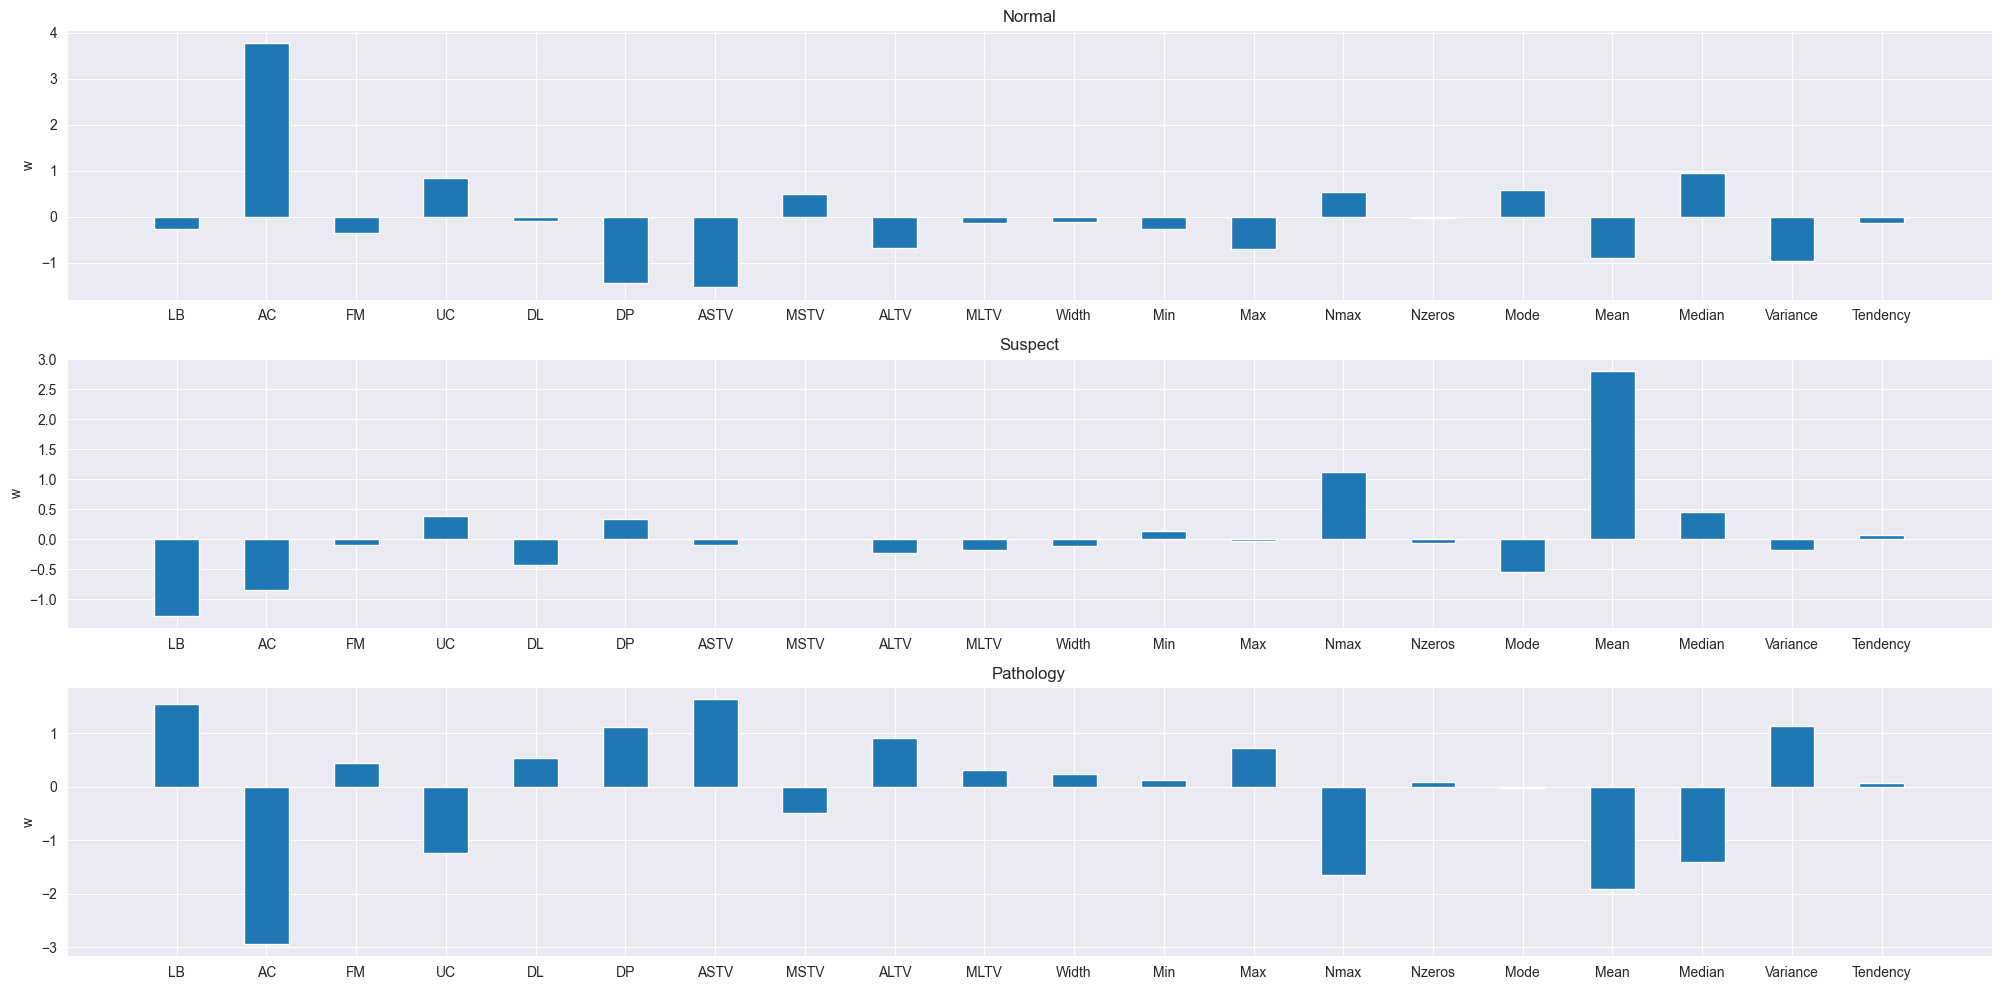

In [67]:
# Change input_mat to your weight matrix from the cell above
w_no_p_table(w_standard,orig_feat)

### Questions:
**Q7:** Mention one advantage and one limitation of using cross entropy.


**Q8:** By selecting one feature at a time and compare their learned weights by looking at plots we had, what can you tell about the weights relations? Why does it happen? **Hint:** notice the sign of the weights and remember that an exponent is a monotonic function.

### Answers:
**Q7:** An advantage of cross entropy loss function is that it is convex, meaning we can be sure that the weights that will give us the minimum (which we'll find using gradient descent) will be the global minimum, and not a local one. A limitation for cross entropy is that it is hard to calculate a minimum for it, especially when there is a lot of parameters, and it can be very computationally demanding.

**Q8:** Positive weight for label means that the exponent function will return a high value, meaning that it has a positive influence on the probability of the label, and for negative weights the exponent will return a small value(<1) meaning it has negative effect on the probability of the label. On the other hand, weights with a value close to zero has non-effect on the probability of a label. Therefore, we would expect that if a weight of a feature for a label is positive, it would be negative for the opposite label (e.g. positive for normal and negative for pathology) and also weights with value close to 0 for some label will remain this way for all labels.
As expected, we can see that the weights have opposite behaviour on Normal and pathology cases, and also that there are cases in which the weights with small value remained small for all labels.

Ok, now let's recall that in the lecture you saw that accuracy is not always our best measure. Sensitivity and specificity can be much more informative and important mostly. The choise to train a model to have better results in sensitivity aspect rather than specificty or vice versa depends on our application.

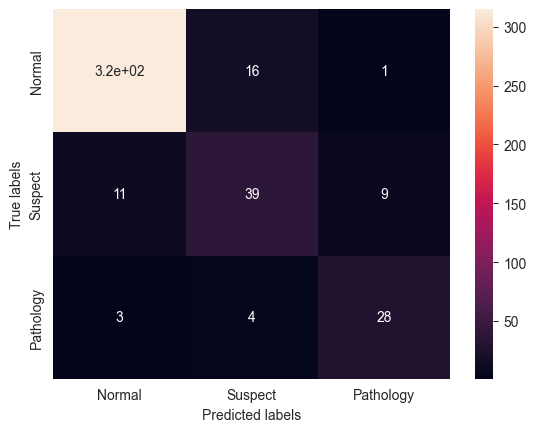

In [68]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_standard)
ax = plt.subplot()
sns.heatmap(cnf_matrix, annot=True, xticklabels=['Normal','Suspect','Pathology'], yticklabels=['Normal','Suspect','Pathology'])
ax.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()

### Questions:
**Q9:** What do you think is more important to us with this data? What is the clinical risk/cost for False Positive (FP) and False Negative (FN)?

### Answers:
**Q9:** We think that sensitivity is more important with this data. We would like to have no FN cases, as the clinical risk of FN has the worst consequences. False Negative is predicting that a patient is 'Normal', when in fact he is 'Pathology' or 'Suspect', the meaning of this is that patient will be treated as 'Normal' when he needs to get the treatment of 'Pathology', which is the extreme opposite case. FP is also risky, but in this case knowing that the patient is truly labeled as 'Normal', makes the risk a bit less than FN (The risk comes from giving a 'Pathology' or 'Suspect' treatment when he doesn't need it)

So, now we will try to handle one of the main issues in learning which is called **overfitting** and one way to deal with it is called **regularization**.

There are several types of regularizations and in this assignment we will expirience two of them:

1) Loss regularization.

2) Validation.

The loss function is a function that takes the predicted values and the labels and *measures* how "close" they are to each other. Our demand is that this "distance" (metric) would be as low as possible. In addition to it, we can add more "demands" that we can represent by mathematical terms. For example, we can demand that the number of coefficients won't get to large or we can try to restrict their values. A more physical example is a demand that our signal has to be smooth. When we try to minimize the new loss function we actually try to find the result which is the comprimise of our demands. We can also "favour" one demand over another using **regularization parameters**.

You saw in the lecture "demands" on the learned weights and represented those demands mathematically using $ L_1 $ and $ L_2 $ norms. The regularization parameter was denoted as $\lambda$ (please notice that sometimes it is common to use the notation of $ c $ where $\lambda = c^{-1}$). Now it's your turn to become artists! Change and/or add arguments to *LogisticRegression* class in the next cell and perform learning using two regularizations: $ L_1 $ and $ L_2 $. Examine your results using the confusion matrix as we did before. Tune your regularization parameter until you get a result that you think is reasonable and that it brings the sensitivity/specificity (depending on what you chose before) to the maximum. 

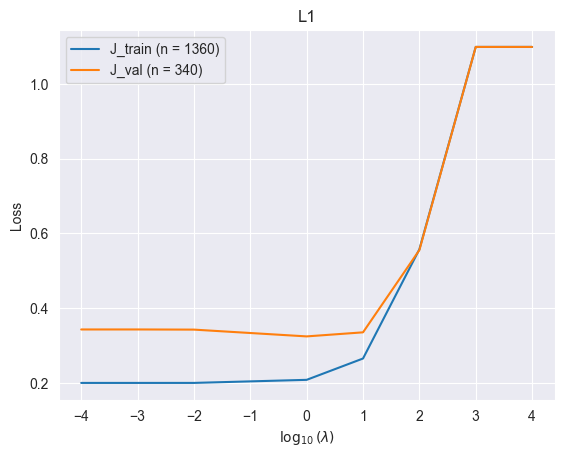

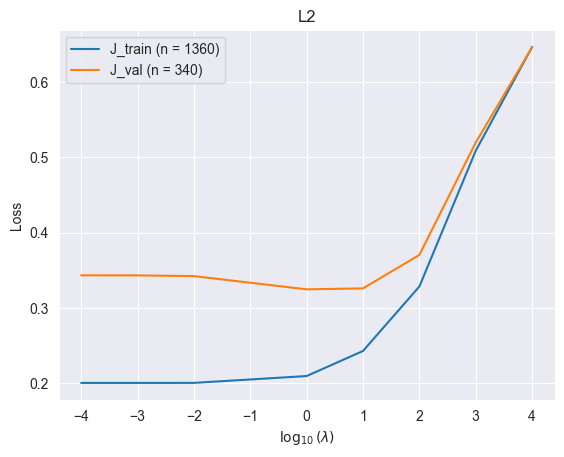

In [69]:
#--------------------------------------------- Implement your code here:----------------------------------------------------------
x_train_orig, x_val_orig, Y_train, y_val= train_test_split(X_train, y_train, test_size = 0.20, random_state = 10, stratify=y_train)
scaler=NSD()
lmbda = np.array([0.0001, 0.001, 0.01, 1, 10, 100, 1000, 10000])
x_train = scaler.fit_transform(x_train_orig,mode='standard',flag=False)
x_val = scaler.transform(x_val_orig,mode='standard',flag=False)
J_train = np.zeros_like(lmbda)
J_val = np.zeros_like(lmbda)
pen1 = 'l1'
solver1 = check_penalty(pen1)
for idx, lb in enumerate(lmbda):
        log_reg=LogisticRegression(penalty=pen1,solver=solver1,C=1/lb,multi_class='ovr')
        log_reg.fit(x_train,Y_train)
        y_pred_prob = log_reg.predict_proba(x_train)
        y_pred_prob_val = log_reg.predict_proba(x_val)
        J_train[idx]=log_loss(Y_train,y_pred_prob)
        J_val[idx]=log_loss(y_val,y_pred_prob_val)
plt.plot(np.log10(lmbda), J_train)
plt.plot(np.log10(lmbda), J_val)
plt.title('L1')
plt.xlabel('$\log_{10}(\lambda)$')
plt.ylabel('Loss')
plt.legend(['J_train (n = ' + str(x_train.shape[0]) + ')', 'J_val (n = ' + str(x_val.shape[0]) + ')'])
plt.show()

pen2 = 'l2'
solver2 = check_penalty(pen2)
for idx, lb in enumerate(lmbda):
    log_reg=LogisticRegression(penalty=pen2,solver=solver2,C=1/lb,max_iter=10000,multi_class='ovr')
    log_reg.fit(x_train,Y_train)
    y_pred_prob = log_reg.predict_proba(x_train)
    y_pred_prob_val = log_reg.predict_proba(x_val)
    J_train[idx]=log_loss(Y_train,y_pred_prob)
    J_val[idx]=log_loss(y_val,y_pred_prob_val)
plt.plot(np.log10(lmbda), J_train)
plt.plot(np.log10(lmbda), J_val)
plt.title('L2')
plt.xlabel('$\log_{10}(\lambda)$')
plt.ylabel('Loss')
plt.legend(['J_train (n = ' + str(x_train.shape[0]) + ')', 'J_val (n = ' + str(x_val.shape[0]) + ')'])
plt.show()


#----------------------------------------------------------------------------------------------------------------------------------

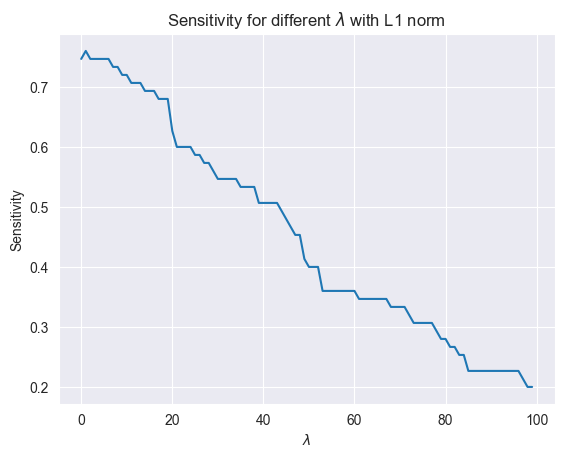

For L1 Norm, the best sensitivity is 0.76, and is given for lambda = 1.0. The confusion matrix for this lambda value is:


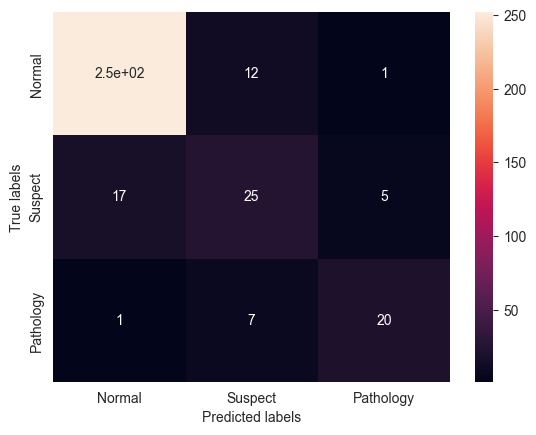

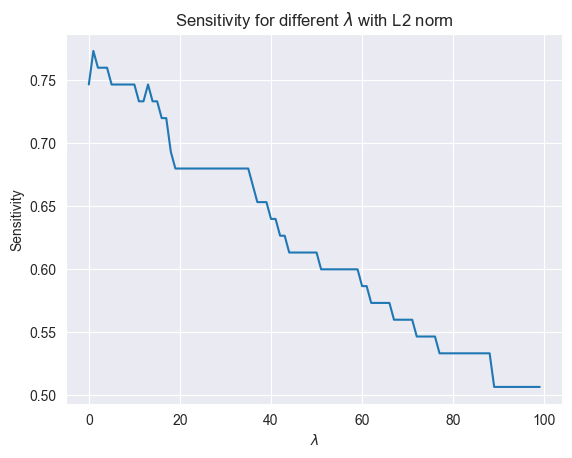

For L2 Norm, the best sensitivity is 0.7733333333333333, and is given for lambda = 1.0. The confusion matrix for this lambda value is:


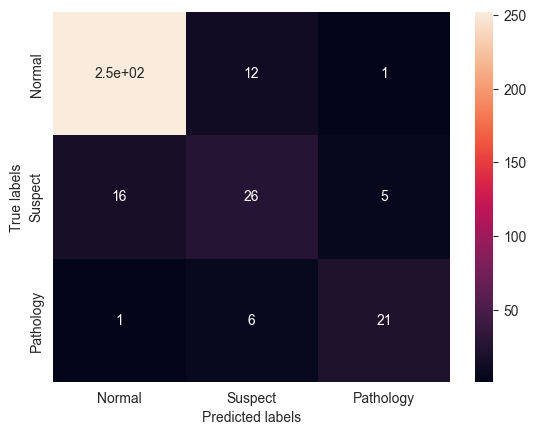

In [70]:
#--------------------------------------------- Implement your code here:----------------------------------------------------------
#After looking at the log loss for lambdas at the range above, we will continue looking for the best lambda in the range of (0,100) (That's where the log losses of the train and validation sets are closest to each other but also minimal), but now we will prioritize having the maximum sensitivity. We saw that the losses for L1 and L2 norms are overall the same, so we will check the sensitivity for both norms in the lambda range mentioned.
#We defined positive as being labeled as 'NOT Normal' and negative for 'Normal'.
#L1
fine_lmbda1 = np.arange(0, 100, 1, dtype=np.float64)
sensitivity1 = np.zeros_like(fine_lmbda1)
max_sens=0
best_idx = 0
for idx, lb in enumerate(fine_lmbda1):
    if lb-0.01 < 0:
        C = np.inf # equivalent to 'none' penalty
    else:
        C = 1/lb
    log_reg=LogisticRegression(penalty=pen1 ,solver='saga' ,C=C ,multi_class='ovr' ,max_iter=10000) #solver liblinear (solver1) failed to compute sensitivity with lb=0, so we used the saga solver that gave the same results except the lb=0 case.
    log_reg.fit(x_train,Y_train)
    y_pred_val = log_reg.predict(x_val)
    cnf_matrix1 = metrics.confusion_matrix(y_val, y_pred_val)
    TP = cnf_matrix1[1][1] + cnf_matrix1[1][2] + cnf_matrix1[2][1] + cnf_matrix1[2][2]
    FN = cnf_matrix1[1][0] + cnf_matrix1[2][0]
    sensitivity1[idx] = TP / (TP + FN)
    if max(sensitivity1) > max_sens:
        max_sens = max(sensitivity1)
        best_idx = idx
        best_cnf = cnf_matrix1
plt.plot(fine_lmbda1, sensitivity1)
plt.xlabel('$\lambda$')
plt.ylabel('Sensitivity')
plt.title('Sensitivity for different $\lambda$ with L1 norm')
plt.show()
print(f'For L1 Norm, the best sensitivity is {max_sens}, and is given for lambda = {fine_lmbda1[best_idx]}. The confusion matrix for this lambda value is:')
ax = plt.subplot()
sns.heatmap(best_cnf, annot=True, xticklabels=['Normal','Suspect','Pathology'], yticklabels=['Normal','Suspect','Pathology'])
ax.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()
#L2
max_sens=0
best_idx = 0
for idx, lb in enumerate(fine_lmbda1):
    if lb-0.01 < 0:
        C = np.inf
    else:
        C = 1/lb
    log_reg=LogisticRegression(penalty=pen2 ,solver=solver2 ,C=C ,multi_class='ovr' ,max_iter=10000)
    log_reg.fit(x_train,Y_train)
    y_pred_val = log_reg.predict(x_val)
    cnf_matrix1 = metrics.confusion_matrix(y_val, y_pred_val)
    TP = cnf_matrix1[1][1] + cnf_matrix1[1][2] + cnf_matrix1[2][1] + cnf_matrix1[2][2]
    FN = cnf_matrix1[1][0] + cnf_matrix1[2][0]
    sensitivity1[idx] = TP / (TP + FN)
    if max(sensitivity1) > max_sens:
        max_sens = max(sensitivity1)
        best_idx = idx
        best_cnf = cnf_matrix1
plt.plot(fine_lmbda1, sensitivity1)
plt.xlabel('$\lambda$')
plt.ylabel('Sensitivity')
plt.title('Sensitivity for different $\lambda$ with L2 norm')
plt.show()
print(f'For L2 Norm, the best sensitivity is {max_sens}, and is given for lambda = {fine_lmbda1[best_idx]}. The confusion matrix for this lambda value is:')
ax = plt.subplot()
sns.heatmap(best_cnf, annot=True, xticklabels=['Normal','Suspect','Pathology'], yticklabels=['Normal','Suspect','Pathology'])
ax.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()
#----------------------------------------------------------------------------------------------------------------------------------

Now that you are happy with your results, let's compare the coefficients of the two norms. Choose two weightning matrices (one calculated using $ L_2 $ and the other calculated using $ L_1 $) and use them as inputs in `w_all_tbl` function. This function sorts the weights according to their $ L_2 $ norm (so the first argument has to be the matrix of $ L_2 $) and compares them to $ L_1 $.

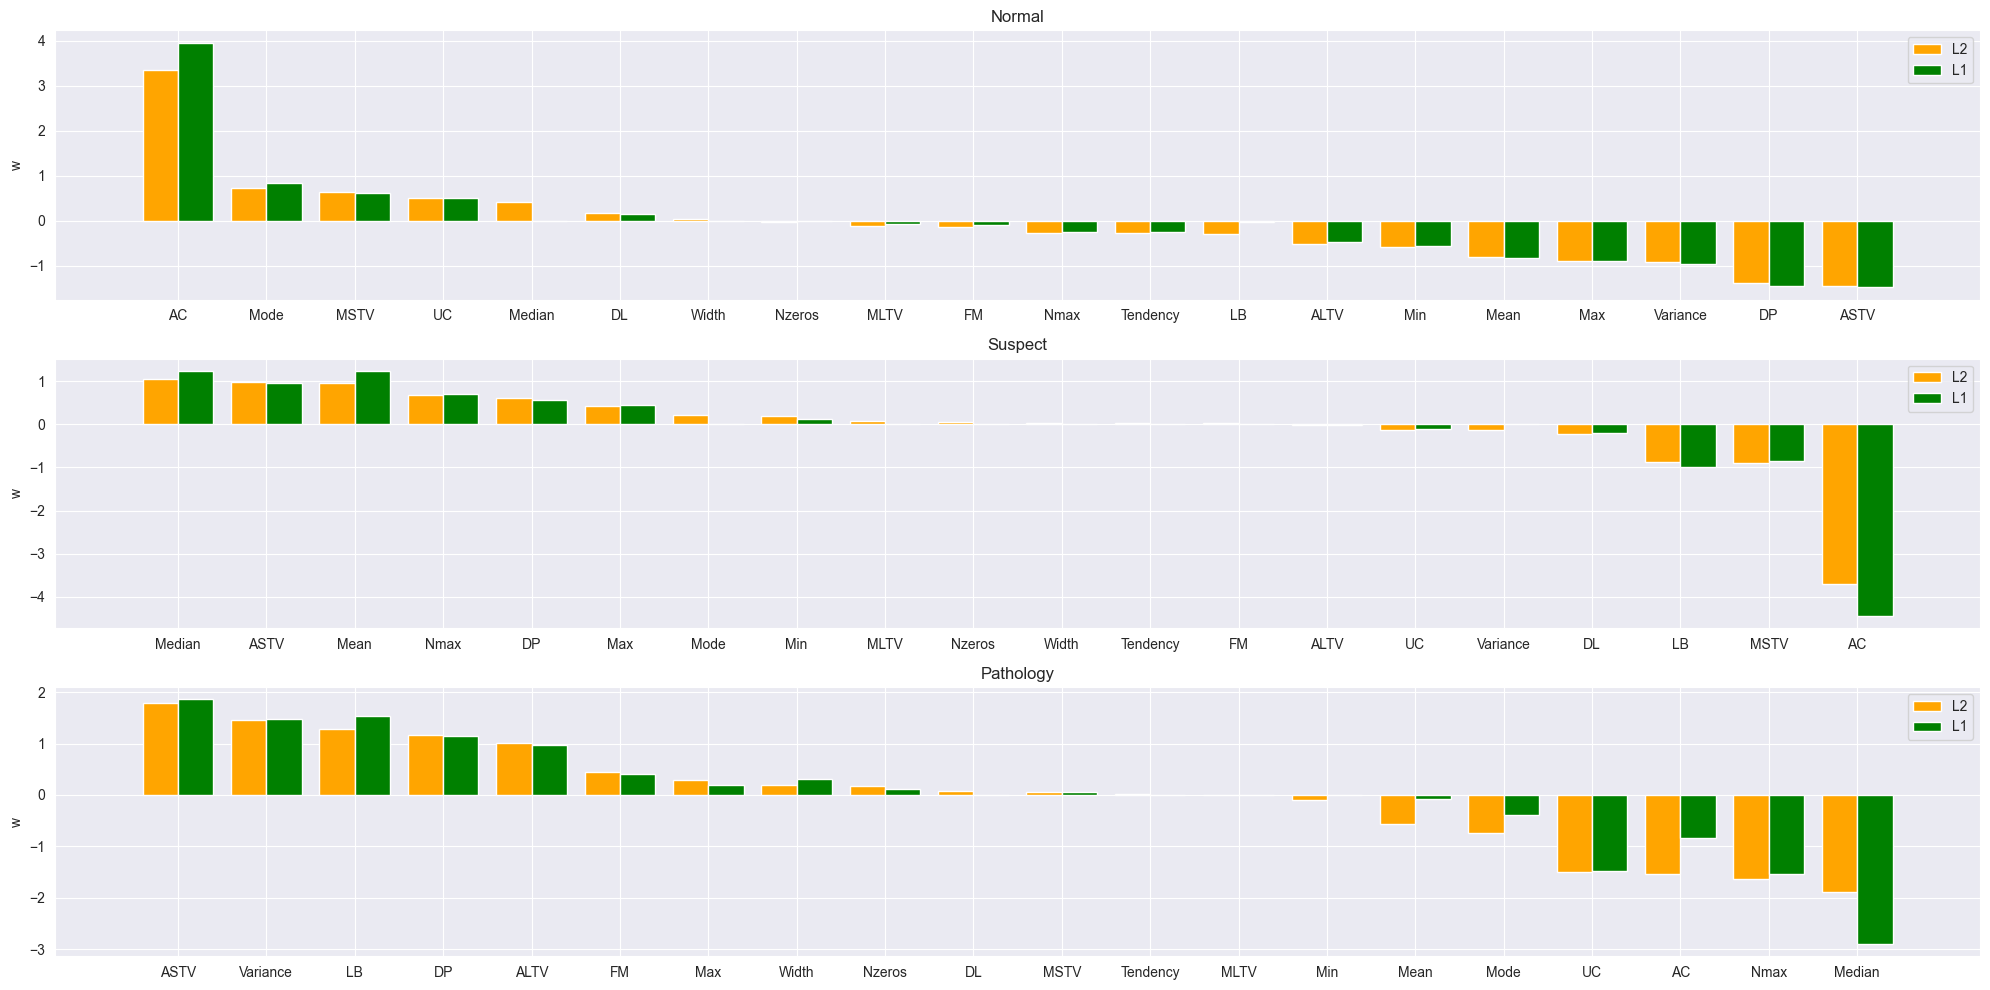

In [71]:
log_reg_l1=LogisticRegression(penalty='l1',solver=solver1,C=1,multi_class='ovr')
log_reg_l1.fit(x_train,Y_train)
log_reg_l2=LogisticRegression(penalty='l2',solver=solver2,C=1,multi_class='ovr')
log_reg_l2.fit(x_train,Y_train)
w_all_tbl(log_reg_l2.coef_, log_reg_l1.coef_, orig_feat)

Notice that the features are ordered differently because they are sorted according to $ L_2 $ values.

### Questions:
**Q10:** What is the difference that you can see when plotting $ L_1 $ vs. $ L_2 $? Could you expect it ahead?

**Q11:** Why is LASSO coupled with feature selection?

### Answers:
**Q10:** The difference is that there are features that are completely nullified under $L_1$ norm, while in $L_2$ they still exist. That's what we would expect, as that's exactly what $L_2$ and $L_1$ norms does - $L_2$ forcing weights to be small, but not making them exactly 0, and $L_1$ (that's actually approximating $L_0$) making the weights vector more sparce, meaning that low weights will become zero, so that will end up with less featues in total.

**Q11:** As explained above, $L_1$ norm makes our weights vector more sparce, meaning that lower value weights will become zero under $L_1$ (LASSO) regularization. Therefore, we can look at LASSO as a component that helps us select the relevant features for our model, as it completely nullifies weights that are not relevant for the model. We can select the features with weights that ended up not zero after the regularization with LASSO.

Now we will use a method that help us to choose what we call *hyperparameters* of the model. This is also a method of regularization and it is called **validation**. There are several types of validation and here we will use *stratified K-fold cross validation*. The hyperparmeters that we would like to choose are the norms that we want to train with and the regularization parameter. Again, we use stratification for the folds to prevent biased learning.

Implement the function `cv_kfold` in `lin_classifier` module. We will use `X_train` as our training set that will be iteratively divided into $ K-1 $ training sets and one validation set. **Notice:** choose wisely where to apply `NSD` fit and transformation to avoid information leakage in every iteration. In this function you should build a list of dictionaries called `validation_dict` where each element in the list contains a dictionary with 4 keys name: `C, penalty, mu and sigma`. For every pair of parameters (`C and penalty`) you will run $ K $ validations and `mu and sigma` will be calculated as the average loss and standard deviation over $ K $ folds respectively. Use the function `log_loss` from `sklearn.metrics` that was already imported in `lin_classifier`. One more thing, you will have to implement a simple modification to `pred_log` function using the `flag` argument. When this flag is set to `True`, the function should return the probabilities of the classes and not the classes themselves. This is the output that `log_loss` function expects to get.
In the next cell, build a list called `C` that has up to 6 regularization parameters (different lambda). Set `K` as number of folds. Choose `mode` for `NSD` and set `penalty = ['l1,'l2]`. Then, excecute the function `cv_kfold` which should return the list of dictionaries named `val_dict` that will be used in the following cell.
This function might take a while to perform depending on $ K $ and the number of regularization parameters you will choose.

In [72]:
#-------------------------------------Implement your code here:----------------------------------------
mode='standard'
penalty = ['l1','l2']
lb=np.array([ 0.001, 0.01, 1, 10, 100, 1000])
C = np.array([1/i for i in lb])
K=5
val_dict = cv_kfold(X_train,y_train,C,penalty,K,mode)
#------------------------------------------------------------------------------------------------------

Let's visualize your results:

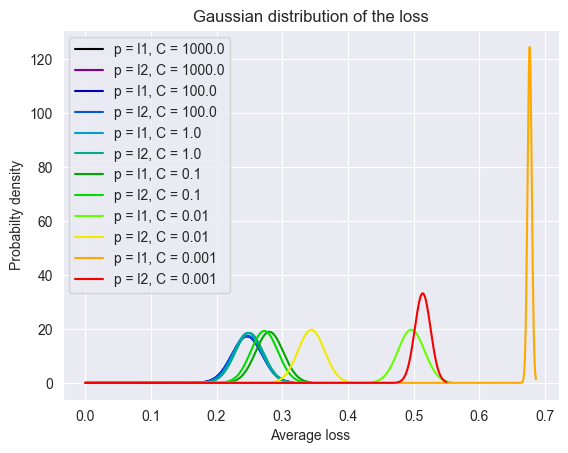

In [73]:
import scipy.stats as stats

cm = plt.get_cmap('nipy_spectral')
for i, d in enumerate(val_dict):
    x = np.linspace(0, d['mu'] + 3 * d['sigma'], 1000)
    ax = plt.plot(x,stats.norm.pdf(x, d['mu'], d['sigma']), label="p = " + d['penalty'] + ", C = " + str(d['C']), color=cm(i*20))
    plt.title('Gaussian distribution of the loss')
    plt.xlabel('Average loss')
    plt.ylabel('Probabilty density')
plt.legend()
plt.show()

You can now choose parameters according to the results. Explain why did you choose these hyperparmeters.

### Answer:
We would like to have minimum loss and standard deviation, and we can also see that generally, L1 and L2 have about the same average loss and standard deviation for a specific $\lambda$ value, especially in the low average loss values. Therefore, we can pick the hyperparameters based mainly on the average loss (That we want to be minimal of course). We can see that for C=0.1 ($\lambda$ = 1) and p=l2, the average loss is minimal, so we chose those hyperparameters.

Now you can train you model with the **full training set**.

In [74]:
#-------------------------------------Implement your code here:----------------------------------------
pen='l2'
solver = check_penalty(pen)
logreg = LogisticRegression(solver=solver, multi_class='ovr', penalty=pen, max_iter=10000,C=100)
y_pred, w = pred_log(logreg, X_train, y_train, X_test)
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred))) + "%")
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred, average='macro'))) + "%")
#------------------------------------------------------------------------------------------------------

Accuracy is: 89.91%
F1 score is: 80.24%


Great job! So as you can see results did get better but not by that much but you got the feeling how to handle with data, what are the basics of learning and what are the real effects and applications of what you saw in the lectures. Now, one last thing: A possible reason for the poor improvements is that our data is probably not linearly separable and we used a linear classifier. There are two basic approaches for this kind of problem:
The first one is to use non-linear classifier and the second one is to perform a transformation on our data so it will become linearly separable in another space. Here is an example of 2D data that can also visualize the problem and the second approach:

<img src="https://sthalles.github.io/assets/fisher-ld/feature_transformation.png" width=900 align="center">

As you can see, the features were non-linearly transformed simply by squaring each feature.

### Questions:
**Q12:** Look at the data. Why was it reasonable to expect that squaring each feature would make the data linearly sperable?

**Q13:** Sugest another non-linear transformation (where **both** new axes are a function of **both** $(x_1,x_2)$ that would make the data linearly seperable so that the line that seperates the two data types will be perpendicular to one of the new axes. Write the new two features (axes) **explicitly** as a funciton of $ (x_1,x_2) $. Use LaTex to write mathematical operations.

### Answers:
**Q12:** By looking at the data, we can see that the data is quadratic separable, but not linearly separable. Therefore, it's expected that applying a quadratic transformation on the axes would make the data linearly separable. We can also show it mathematically; By visualizing the data, we can assume that the "red" data and the "blue" data maintain a circle equation with the same center and different radiuses : $x_1^2$ + $x_2^2$ = r (for red) and $x_1^2$ + $x_2^2$ = b (for blue). Now, in the new feature space given, the axes are $x_1^2$ = $\tilde{x_1}$ and $x_2^2$ = $\tilde{x_2}$, so that the equations are now $\tilde{x_1} +\tilde{x_2}$ = r and $\tilde{x_1} +\tilde{x_2}$ = b which represent 2 linear lines. We can also see that in the new feature space, the red and blue data are on two different straight lines (not perfect lines of course, as the data isn't really maintaining a circle equation but it's a good approximation) as expected.


**Q13:** If we want the line that separates the two data types to be perpendicular to one of the new axes, the data should shift to straight lines that is also perpendicular to the axes (lines with an equation form of 'x=a' or 'y=a' for some number a). A transformation that'll do it can simply be, for example : $x_1$ -> $x_1^2 + x_2^2$ = $\tilde{x_1}$, $x_2$ -> $x_1^2 - x_2^2$ = $\tilde{x_2}$ (some function of $(x_1,x_2)$). Assuming that the data maintain a circle equation as explained in Q12, the red data with a circle equation of $x_1^2$ + $x_2^2$ = r will shift to a linear line of $\tilde{x_1}$ = r ($\tilde{x_1}$ = b for the blue data), and thus a line that separates the data will also be with the form of $\tilde{x_1}$ = a (some number a, which is greater than r and lower than b), which is perpendicular to the $\tilde{x_1}$ axis.

Finally, just to get the feeling of better results when we go non-linear, let's try the random forest classifier. All you have to do is just choose one of the modes of the `NSD` tranformation method and see if you got better results:

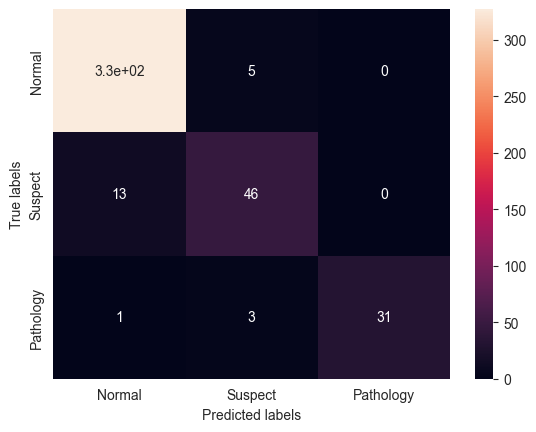

Accuracy is: 94.84%
F1 score is: 90.84%


In [75]:
from sklearn.ensemble import RandomForestClassifier as rfc
mode = 'standard' # choose your method
clf = rfc(n_estimators=10)
clf.fit(scaler.fit_transform(X_train, mode=mode), y_train)
y_pred = clf.predict(scaler.transform(X_test, mode=mode))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cnf_matrix, annot=True, xticklabels=['Normal', 'Suspect', 'Pathology'],
            yticklabels=['Normal', 'Suspect', 'Pathology'])
ax.set(ylabel='True labels', xlabel='Predicted labels')
plt.show()
print("Accuracy is: " + str("{0:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred))) + "%")
print("F1 score is: " + str("{0:.2f}".format(100 * metrics.f1_score(y_test, y_pred, average='macro'))) + "%")

That's all folks!